특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa' 'versicolor' 'virginica']
데이터 크기: (150, 4)
훈련 세트 크기: (120, 1)
테스트 세트 크기: (30, 1)
모델 정확도 (Accuracy): 1.0


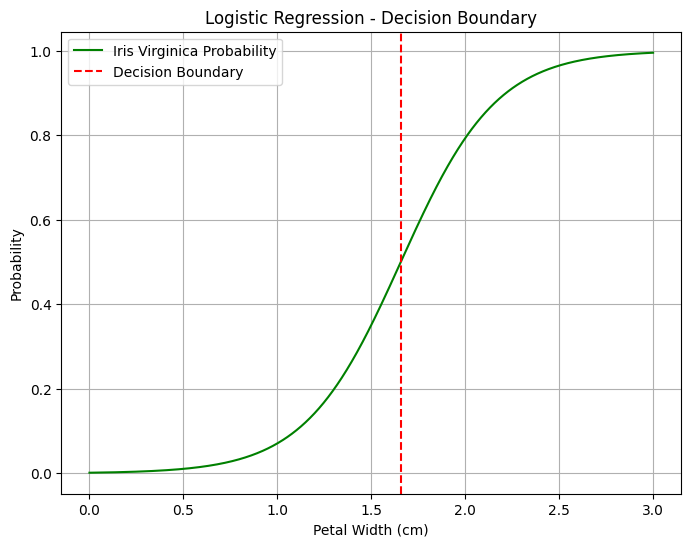

In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터 준비
iris = load_iris()

# 데이터의 구조 이해
print("특성 이름:", iris.feature_names)
print("타깃 이름:", iris.target_names)
print("데이터 크기:", iris.data.shape)

# 타깃 데이터를 이진화 (Iris Virginica 여부)
X = iris.data[:, 3].reshape(-1, 1)  # petal width (cm) 값만 사용
y = (iris.target == 2).astype(int)  # virginica는 1, 나머지는 0

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 세트와 테스트 세트 크기 출력
print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)

# 3. 모델 학습 / 예측 및 평가
# Logistic Regression 모델 정의
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도 (Accuracy):", accuracy)

# 4. 결정 경계 시각화
# 0부터 3까지 1000개의 점으로 예측 확률 계산
X_range = np.linspace(0, 3, 1000).reshape(-1, 1)
probabilities = model.predict_proba(X_range)[:, 1]  # virginica 확률

# 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(X_range, probabilities, label="Iris Virginica Probability", color="green")
decision_boundary = X_range[np.argmax(probabilities >= 0.5)]  # 결정 경계
plt.axvline(x=decision_boundary, color="red", linestyle="--", label="Decision Boundary")
plt.title("Logistic Regression - Decision Boundary")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()


모델 정확도가 1.0로 완벽한 성능을 보입니다. 이는 petal width 가 Iris Virginica를 분류하는 데 매우 강력한 지표임을 나타냅니다.
결정 경계 평가:
결정 경계는 petal width 값이 약 1.7일 때입니다.
확률 곡선과 데이터 포인트를 보면, 모델이 Virginica(1)와 비-Virginica(0)를 정확히 분리하고 있음을 확인할 수 있습니다.